In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
# Create training data and resize images

DATADIR = "./dataset/CASIA2"
CATEGORIES = ["original", "spliced"]
IMG_WIDTH = 256
IMG_HEIGHT = 384
NUM_CHANNELS = 3

# Create the training data
def create_training_data():
    training_data = []
     
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))  #, cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
                b,g,r= cv2.split(new_array)
                new_array = cv2.merge((r,g,b))
                training_data.append([new_array, class_num])
            except:
                print(img)
    
    return(training_data)

In [3]:
# Get training data

training_data = create_training_data()

Thumbs.db


In [4]:
# Number of samples
print(len(training_data))

12614


In [5]:
# Shuffle data
import random

for _ in range(100):
    random.shuffle(training_data)

In [6]:
# Labels
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
1
1
0
1
1


In [7]:
o_count = 0
f_count = 0

for sample in training_data:
    if sample[1] == 0:
        o_count += 1
    else:
        f_count += 1
        
o_count, f_count

(7491, 5123)

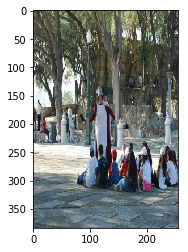

In [8]:
# Show image

plt.imshow(training_data[5][0])
plt.show()


In [9]:
# Shape of the image

training_data[0][0].shape

(384, 256, 3)

In [10]:
# Split into features and labels

x = []
y = []

for data, label in training_data:
    x.append(data)
    y.append(label)

# Convert to numpy arrays
x = np.array(x).reshape(-1, IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS) / 255
y = np.array(y)

NameError: name 'IMG_SIZE' is not defined

In [ ]:
# Save the training data

pickle_out = open("CASIA2_x_348x256.pickle", "wb")
pickle.dump(x, pickle_out, protocol = 4)
pickle_out.close()

pickle_out = open("CASIA2_y_348x256.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()